https://www.microsoft.com/en-us/research/project/project-malmo/

http://gym.openai.com/

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import astar as a
import maze as Maze
import agent as Agent
import seaborn as sns

# Run the reinforcement learning algo through the maze

In [2]:
def run_maze(maze, robot, games, max_steps, starting_grid):
    """Run through a given maze
    params:
    -------
    maze: Maze object
    
    robot: Agent object
    
    games: int
    Defines how many games the model will run
    
    max_steps: int
    Defines how many steps can occur in a game, to avoid infinite loops
    
    starting_grid: list
    The starting matrix (maze)
    """
    moveHistory = []
    for i in range(games): # number of games
            
        while not maze.isGameOver():     # while the game is not over
            state, _ = maze.getStateAndReward()   # gets state and reward
            action = robot.chooseAction(state, maze.allowedStates[state]) # update the actions
            maze.updateMaze(action)
            state, reward = maze.getStateAndReward()
            robot.updateStateHistory(state, reward)
            if maze.steps > max_steps:              # cut prematurely to avoid infinite looping
                x, y = maze.get_matrix().shape
                maze.robotPosition = (x - 1, y - 1)
        robot.learn()                              # learns
        moveHistory.append(maze.steps)             # keep tracking of steps
        maze = Maze.Maze(starting_grid)               # resets the maze but not the agent.
    return moveHistory

In [3]:
def gen_matrix(size, wall_ratio):
    """ Generate a matrix
    params:
    -------
    size: tuple of ints
    Defines the size of the matrix
    
    wall_ratio: double
    Defines the amount of walls (1s) in the matrix   
    When the amount of walls exceeds a certain amount (1 - ((w+h - 2) / w*h) there are no possible solutions
    """
    total = size[0] * size[0]
    wall_nodes = int(wall_ratio * total) # 1s
    path_nodes = total - wall_nodes # 0s

    # CREATE LIST & SHUFFLE
    my_list = [0]*path_nodes + [1]*wall_nodes
    random.shuffle(my_list)

    # REFORMAT TO MATRIX IN REQUIRED SIZE
    matrix = np.zeros(size)
    my_list = np.array(my_list)
    matrix = my_list.reshape((size))
    
    # FORCE START AND ENDNODE TO BE 0
    matrix[0,0] = 0
    matrix[size[0]-1, size[0]-1] = 0
    
    visited = np.zeros(size, dtype=int)
    return matrix, visited

In [4]:
def gen_valid_matrix(size, wall_ratio):
    """ Generate new matrixes until a valid maze matrix is found with an A* algorithm
    params:
    -------
    size: tuple of ints
    defines the size of the matrix
    
    wall_ratio: double
    defines the amount of walls (1s) in the matrix
    When the amount of walls exceeds a certain amount (1 - ((w+h - 2) / (w*h)) there are no possible solutions
    """
    matrix = []
    res = None
    w = size[0]
    h = size[1]
    #max_ratio = 1 - ((w + h - 2) & (w * h))
    #if max_ratio < wall_ratio:
    #    print("With a wall_ratio higher than %s , there is no route from start to end in the maze." % max_ratio)
    #    print("Lowering the ratio to the maximum possible ratio")
    #    wall_ratio = max_ratio
    while(res==None):
        matrix, visit =  gen_matrix(size, wall_ratio)
        walls = [tuple(coord) for coord in np.argwhere(matrix == 1)]
        star = a.AStar()
        star.init_grid(size[0], 
                       size[1], 
                       walls, 
                       (0,0), 
                       (size[0]-1, size[0]-1)
                      )
        res = star.solve()
    return matrix, len(res)

In [5]:
def run(params, plot_semi=False, plot_heat=False):
    """Run a reinforcement learning model with the given params
    params:
    -------
    params: dict
    Example:
    {
    "size": (10,10),
    "cmap": sns.color_palette("Paired"),
    "wall_ratio": 0.5,
    "games": 10000,
    "alpha": 0.01,
    "randomFactor": 0.9
    }
    
    plot_semi: Bool
    Plots a semilogy of the history if set to true
    
    plot_heat: Bool
    Plots the maze with a heatmap
    
    """
    input_maze, shortest = gen_valid_matrix(params["size"], params["wall_ratio"])
    maze = Maze.Maze(input_maze)
    robot = Agent.Agent(maze, alpha=params["alpha"], randomFactor=params["randomFactor"])
    history = run_maze(maze, robot, params["games"], 1000, input_maze)
    if (plot_semi == True | plot_heat == True):
        plt.figure(figsize=(16, 16))
        if plot_semi:
            plt.figure(figsize=(16, 16))
            plt.subplot(211)
            plt.semilogy(history, 'b--')
            plt.legend(['alpha: ' + str(params["alpha"]) + " -- randomFactor: " + str(params["randomFactor"])])
        if plot_heat:
            plt.subplot(212)
            plt.show(sns.heatmap(input_maze, cmap=params["cmap"], cbar=False, linewidths=.5))
        plt.show()
    return history, shortest, input_maze

# 1. 10x10 and 20x20 maze

<Figure size 1152x1152 with 0 Axes>

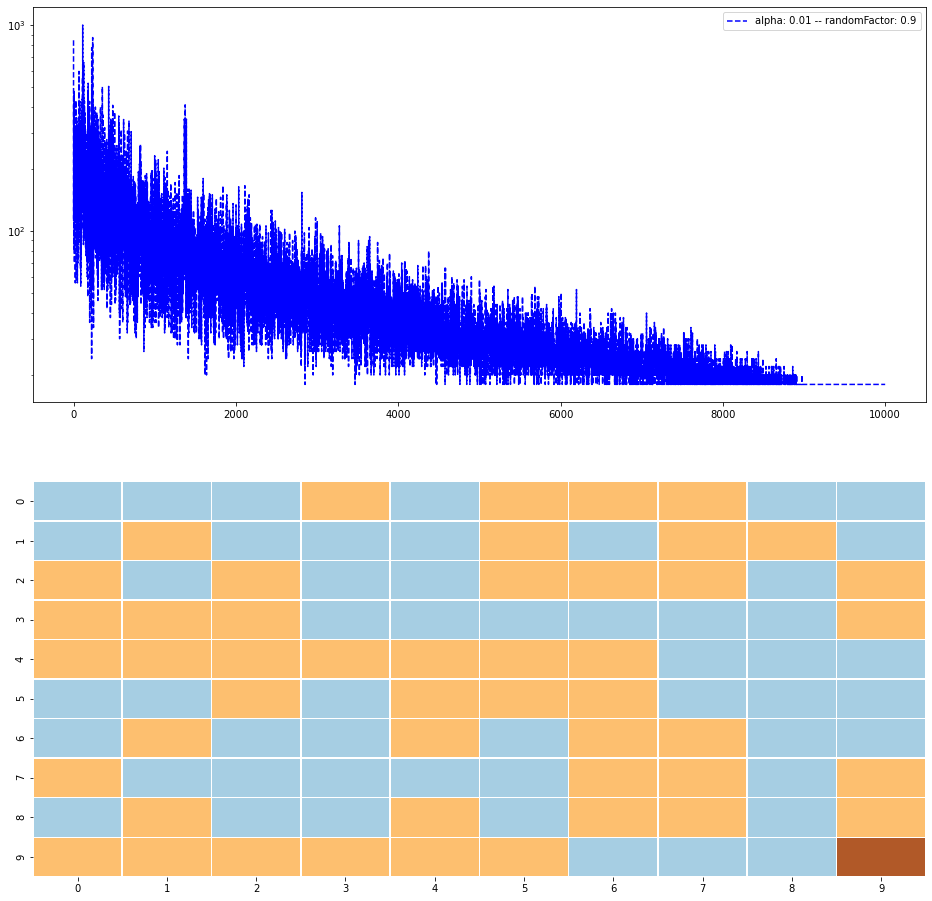

The shortest path is 19


In [6]:
parameters = {
    "size": (10,10),
    "cmap": sns.color_palette("Paired"),
    "wall_ratio": 0.5,
    "games": 10000,
    
    "alpha": 0.01,
    "randomFactor": 0.9
}
history, shortest, maze = run(parameters, plot_semi=True, plot_heat=True)
print("The shortest path is %s" % shortest)

<Figure size 1152x1152 with 0 Axes>

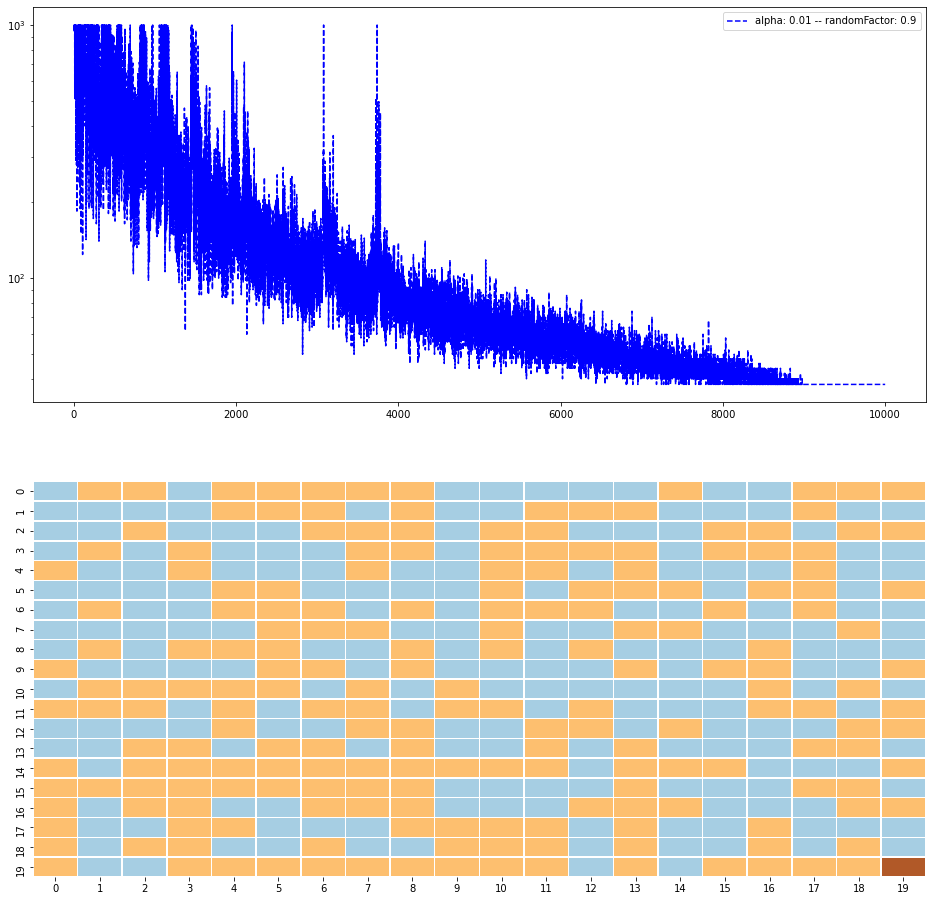

The shortest path is 39


In [7]:
parameters = {
    "size": (20,20),
    "cmap": sns.color_palette("Paired"),
    "wall_ratio": 0.5,
    "games": 10000,
    
    "alpha": 0.01,
    "randomFactor": 0.9
}
history, shortest, maze = run(parameters, plot_semi=True, plot_heat=True)
print("The shortest path is %s" % shortest)

# 2. 10%, 20%, 50% wall ratio


<Figure size 1152x1152 with 0 Axes>

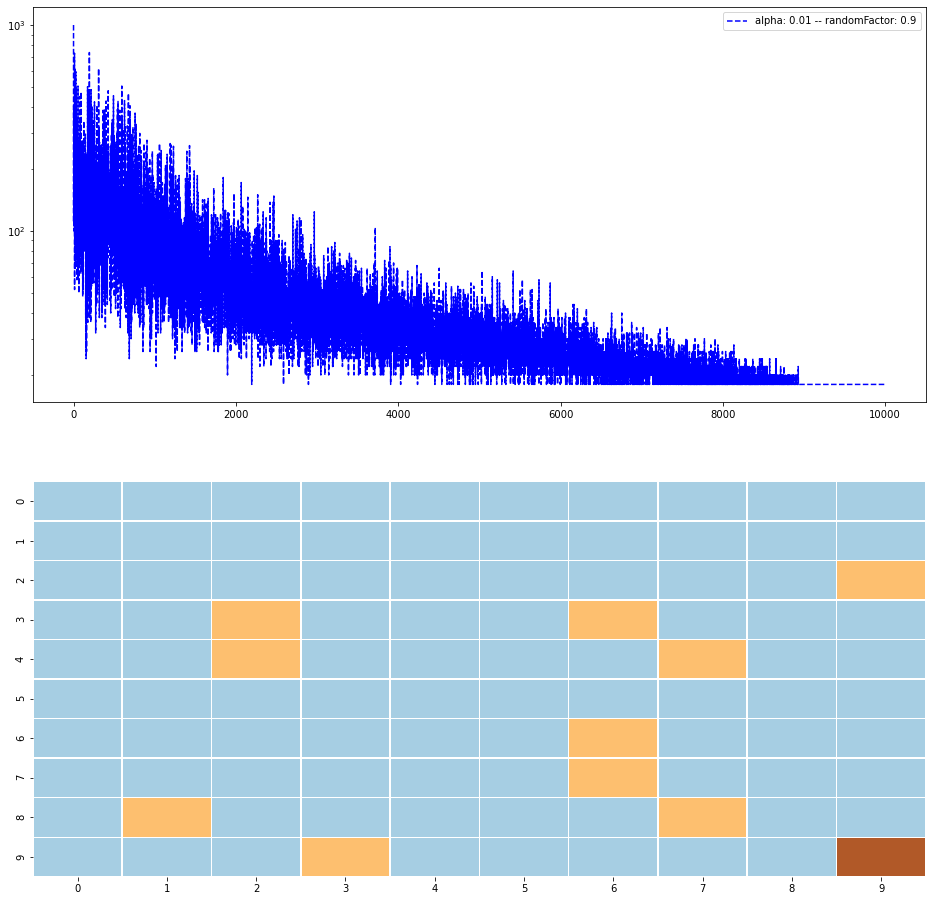

The shortest path is 19


In [8]:
parameters = {
    "size": (10,10),
    "cmap": sns.color_palette("Paired"),
    "wall_ratio": 0.1,
    "games": 10000,
    
    "alpha": 0.01,
    "randomFactor": 0.9
}
history, shortest, maze = run(parameters, plot_semi=True, plot_heat=True)
print("The shortest path is %s" % shortest)

<Figure size 1152x1152 with 0 Axes>

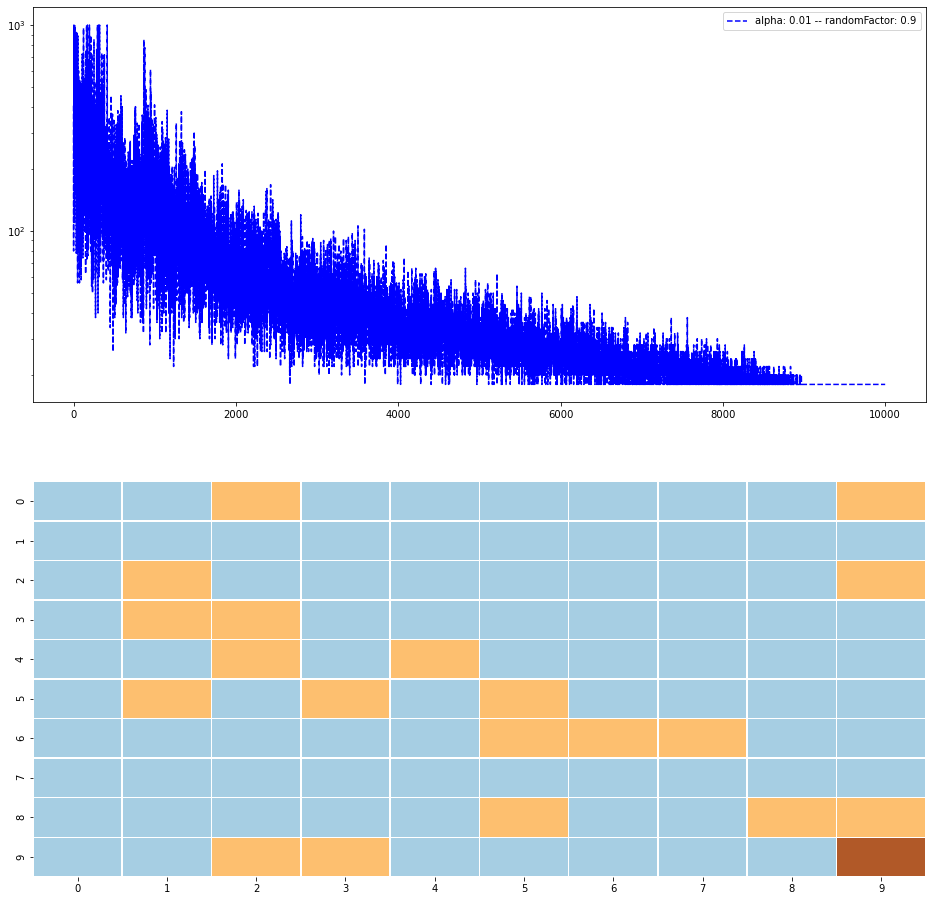

The shortest path is 19


In [9]:
parameters = {
    "size": (10,10),
    "cmap": sns.color_palette("Paired"),
    "wall_ratio": 0.2,
    "games": 10000,
    
    "alpha": 0.01,
    "randomFactor": 0.9
}
history, shortest, maze = run(parameters, plot_semi=True, plot_heat=True)
print("The shortest path is %s" % shortest)

<Figure size 1152x1152 with 0 Axes>

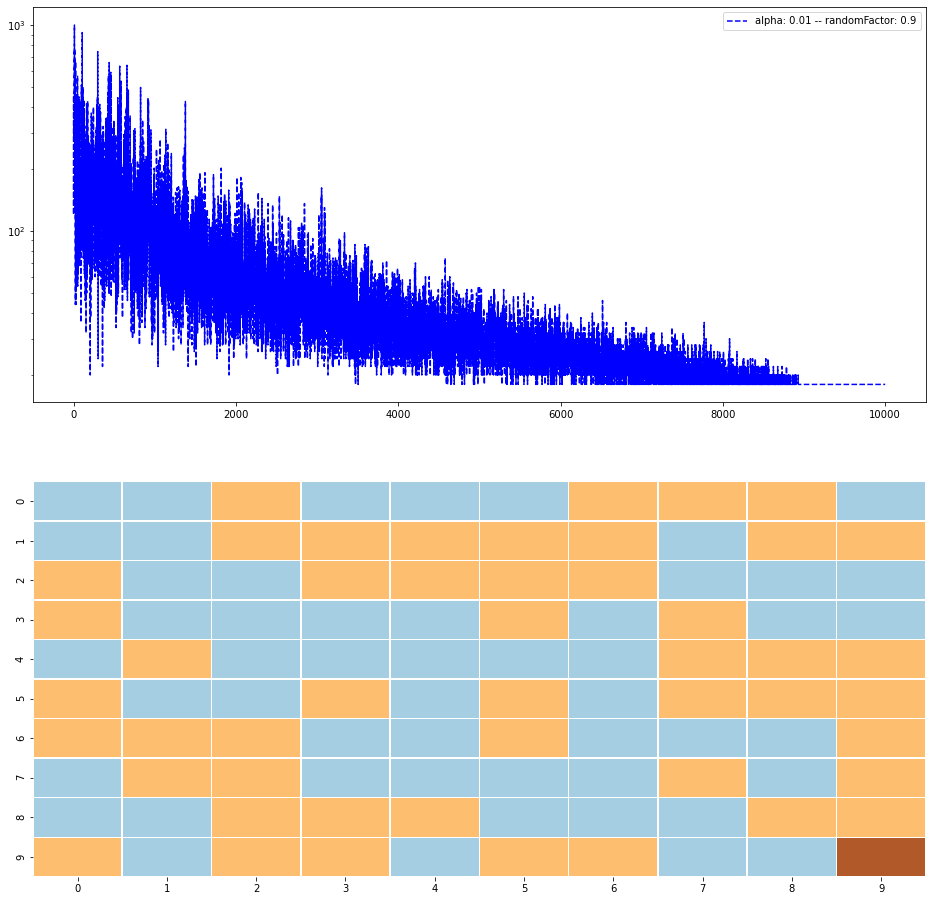

The shortest path is 19


In [10]:
parameters = {
    "size": (10,10),
    "cmap": sns.color_palette("Paired"),
    "wall_ratio": 0.5,
    "games": 10000,
    
    "alpha": 0.01,
    "randomFactor": 0.9
}
history, shortest, maze = run(parameters, plot_semi=True, plot_heat=True)
print("The shortest path is %s" % shortest)

# 3. The necessary steps for the agent to leave the maze

The minimum amount of steps the agent needs to take is defined after running through the A* algorithm. This is then printed out for each maze that has been completed.

The games amount of games a model is required to play to reach the optimal value depends a lot on the parameters, and as seen above when running an alpha of 0.01 and a randomFactor of 0.9, the agent consistently improves, and eventually (and consistently) reaches the end of the learning process at around 8500 games.

# 4. Tune the hyperparameters alpha and randomFactor for a 10x10 maze

In [11]:
alpha_values = [0.01, 0.1, 0.3, 0.5]
randomFactor_values = [0.9, 0.7, 0.5, 0.3, 0.1]

param_list = []

for a_val in alpha_values:
    for rf_val in randomFactor_values:
        parameters = {
            "size": (10,10),
            "cmap": sns.color_palette("Paired"),
            "wall_ratio": 0.5,
            "games": 10000,

            "alpha": a_val,
            "randomFactor": rf_val
        }
        param_list.append(parameters)

<Figure size 1152x1152 with 0 Axes>

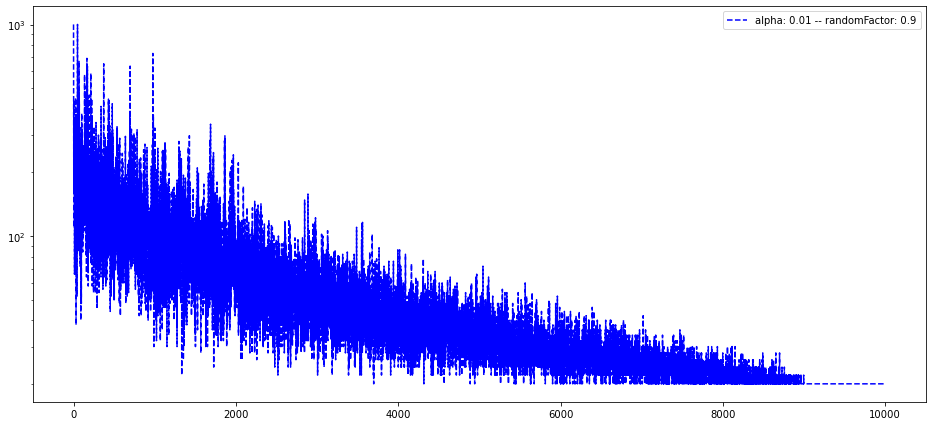

The shortest path is 21


<Figure size 1152x1152 with 0 Axes>

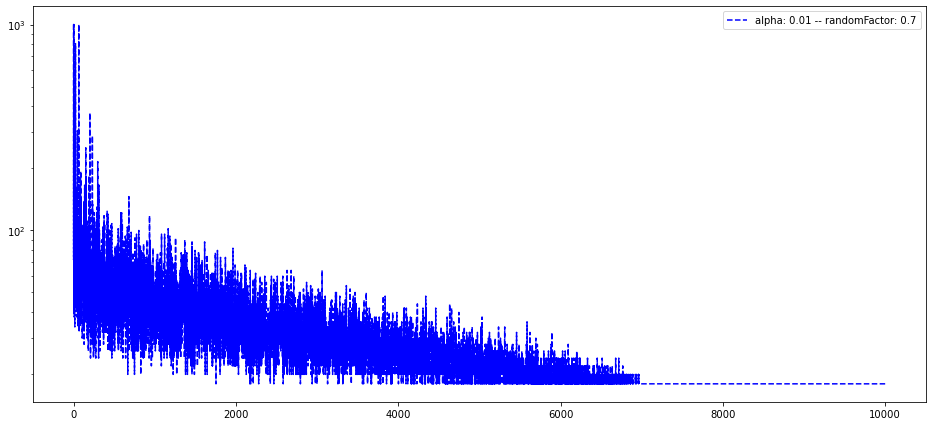

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

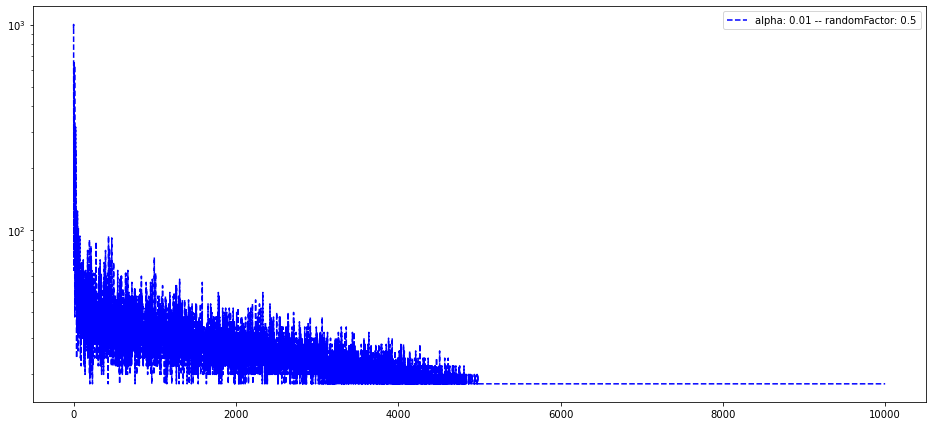

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

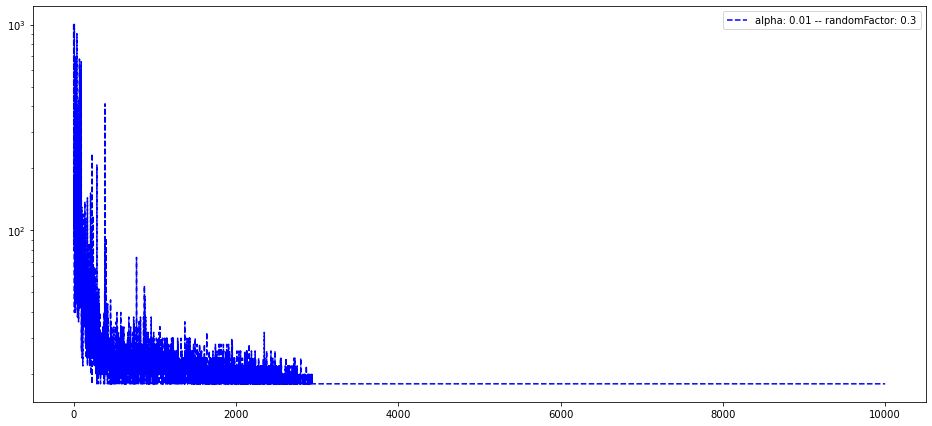

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

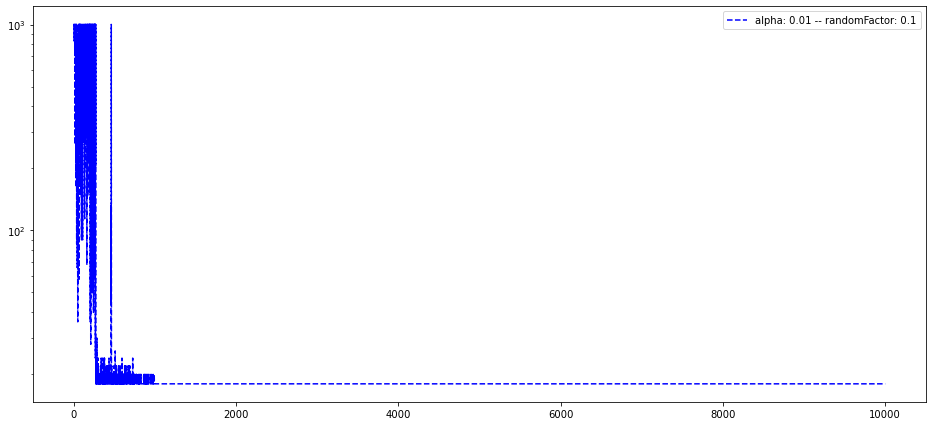

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

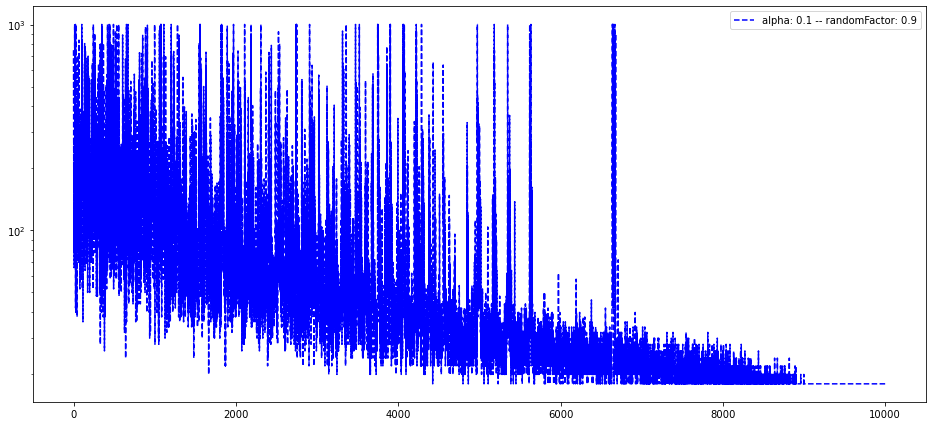

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

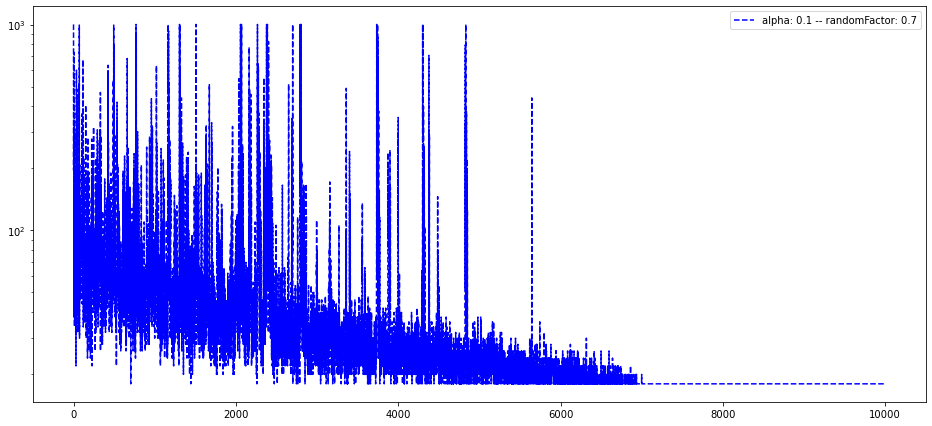

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

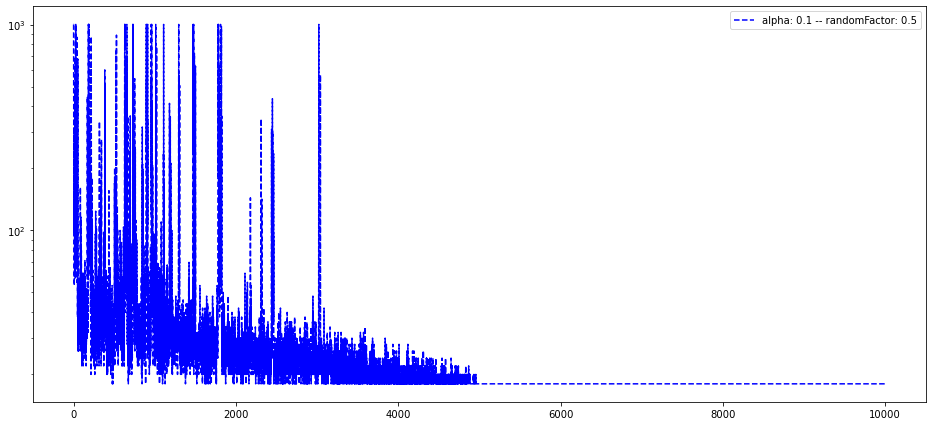

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

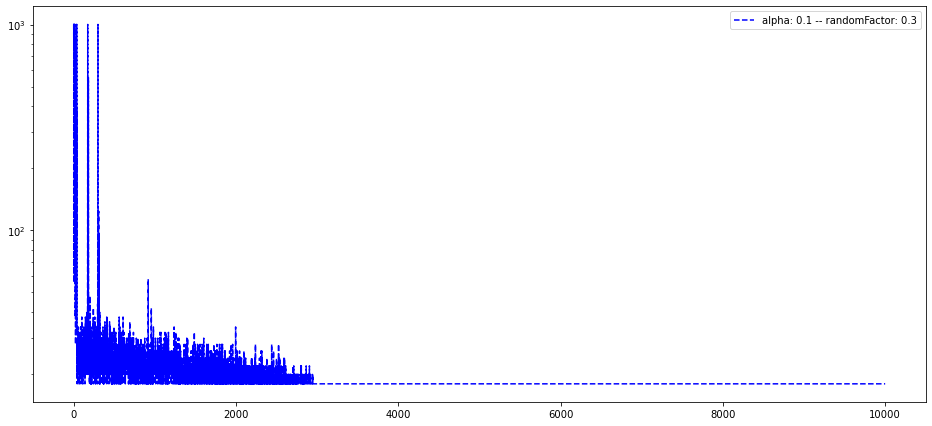

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

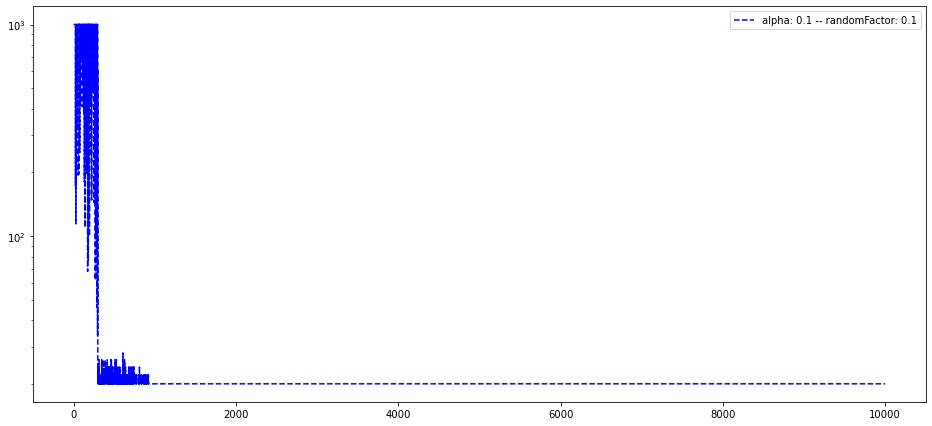

The shortest path is 21


<Figure size 1152x1152 with 0 Axes>

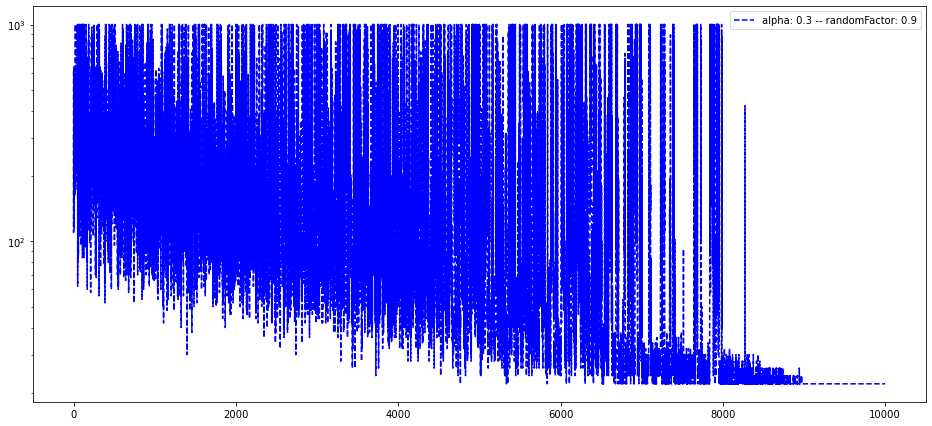

The shortest path is 23


<Figure size 1152x1152 with 0 Axes>

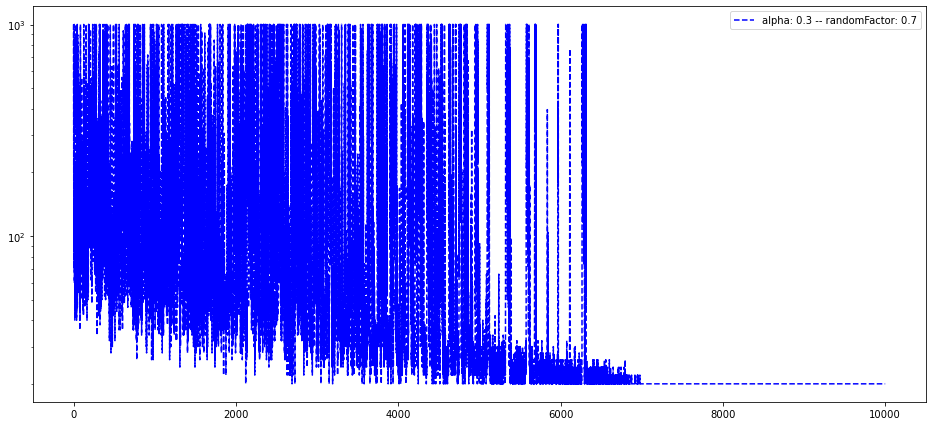

The shortest path is 21


<Figure size 1152x1152 with 0 Axes>

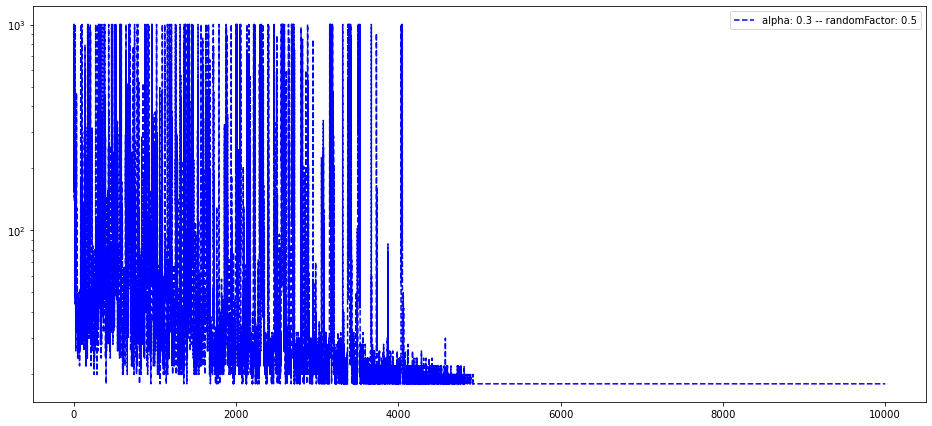

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

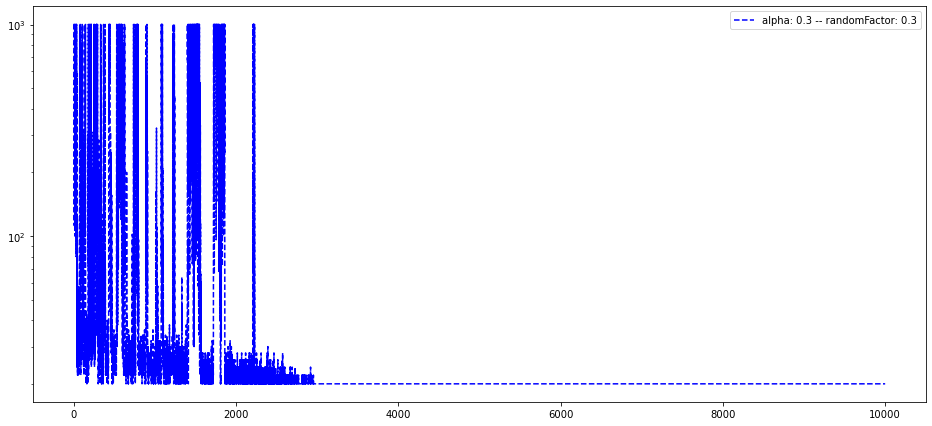

The shortest path is 21


<Figure size 1152x1152 with 0 Axes>

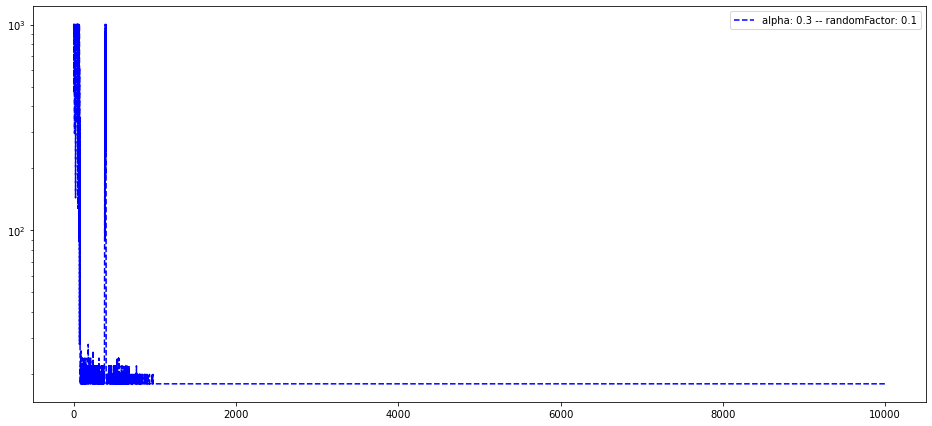

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

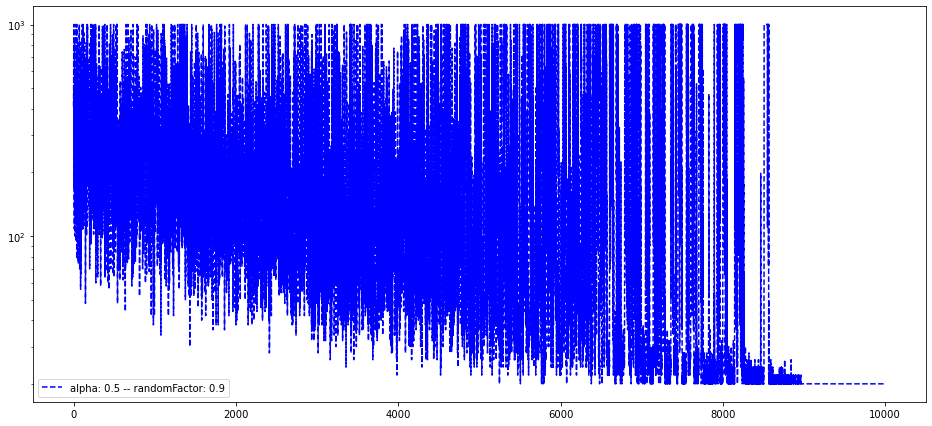

The shortest path is 21


<Figure size 1152x1152 with 0 Axes>

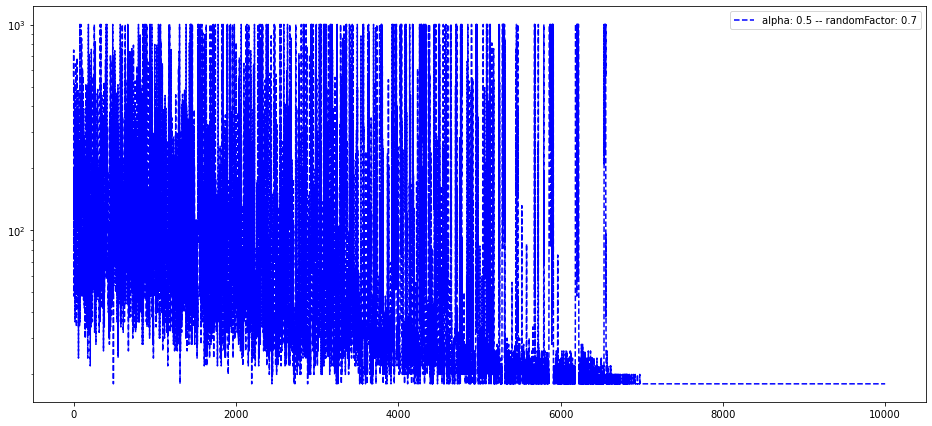

The shortest path is 19


<Figure size 1152x1152 with 0 Axes>

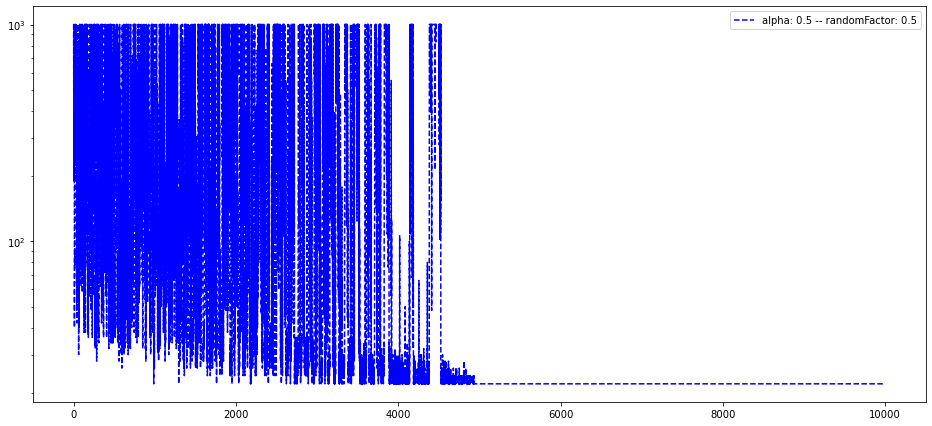

The shortest path is 23


<Figure size 1152x1152 with 0 Axes>

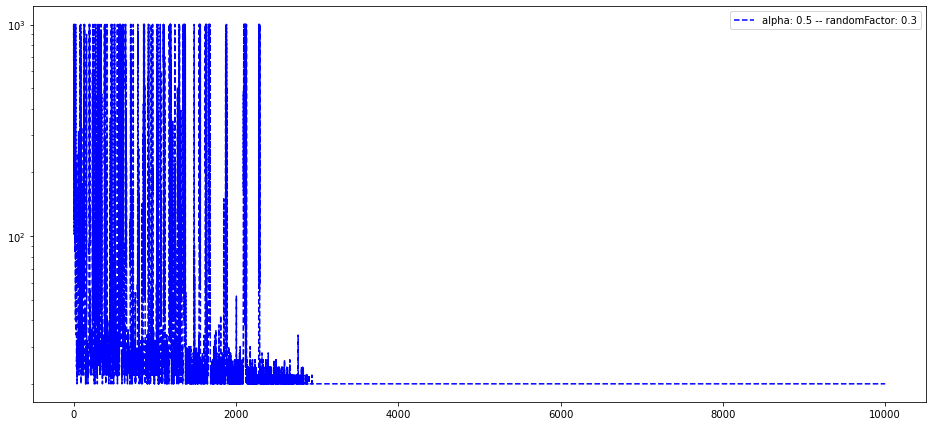

The shortest path is 21


<Figure size 1152x1152 with 0 Axes>

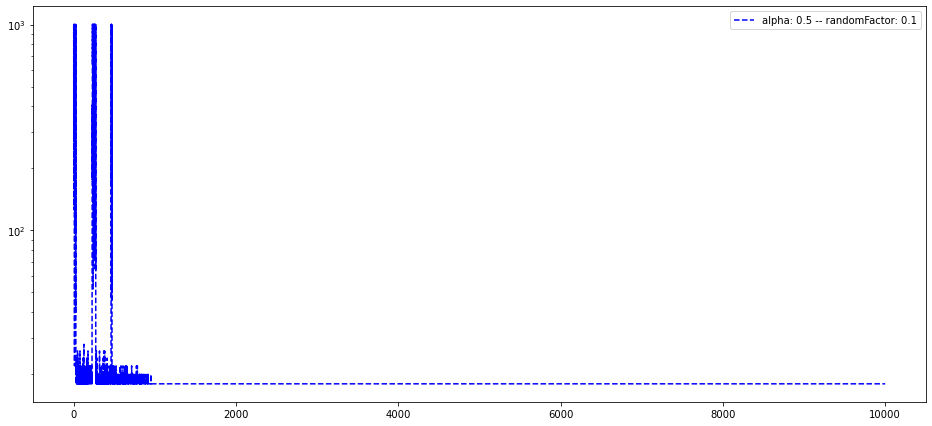

The shortest path is 19


In [12]:
for params in param_list:
    history, shortest, maze = run(params, plot_semi=True, plot_heat=False)
    print("The shortest path is %s" % shortest)